In [34]:
import pandas as pd 

In [35]:
df=pd.read_excel("Bike_Price_Prediction.xlsx")

In [36]:
df.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [37]:
df.isnull().sum()

S.no                  0
Bike_company          0
Bike_model            0
Manufactured_year     0
Engine_warranty       2
Engine_type           0
Fuel_type             0
CC(Cubic capacity)    0
Fuel_Capacity         1
Price                 0
dtype: int64

In [38]:
df=df[['Price', 'Manufactured_year']]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Price              308 non-null    int64
 1   Manufactured_year  308 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [40]:
df.shape

(308, 2)

In [41]:
df.isnull().sum()

Price                0
Manufactured_year    0
dtype: int64

In [42]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [52]:
df['Manufactured_year'].min()

np.int64(1790)

In [79]:
df1 = df[df['Manufactured_year'] > 2005]

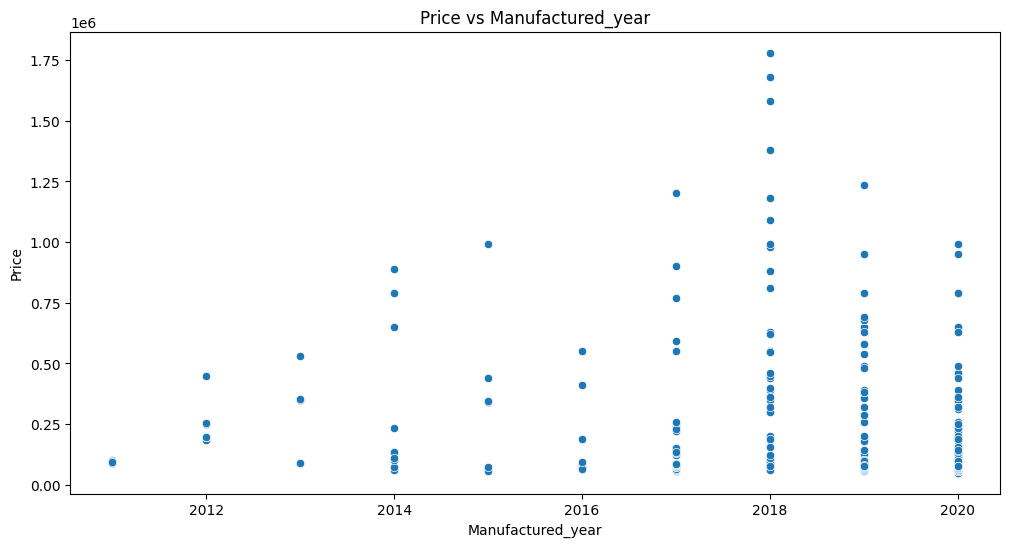

In [80]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Manufactured_year',y='Price',data=df1)
plt.title('Price vs Manufactured_year')
plt.xlabel("Manufactured_year")
plt.ylabel('Price')
plt.show()

In [81]:
X=df[['Manufactured_year']]
print(X.shape)
y=df['Price']


(304, 1)


In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)
print(f"\nTraining set shape: {X_train.shape}")
print(f"\nTesting set shape: {X_test.shape}")


Training set shape: (243, 1)

Testing set shape: (61, 1)


In [83]:
model=LinearRegression()
model.fit(X_train,y_train)
print("\nModel Training complete: ")

print(f"Coefficient (w1): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")


Model Training complete: 
Coefficient (w1): -294.95285373879494
Intercept (b): 847285.6783161238


In [84]:
y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"\n Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


 Mean Squared Error (MSE): 105794684840.68
R-squared (R2): -0.01


In [85]:
new_experience = np.array([[2019]])
predicted_price=model.predict(new_experience)
print(f"\n Predicted price for {new_experience[0][0]} year of manufacture : {predicted_price[0]:.2f}")



 Predicted price for 2019 year of manufacture : 251775.87


d:\TechAxis\week23\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
